In [1]:
import nltk
from nltk.corpus import cmudict
import itertools
from hmmlearn import hmm
import numpy as np

Load the sonnets from the file provided. `sonnets` is indexed by sonnet number (0-indexed, so shifted -1 from sonnet number), then by line number (again, 0-indexed).

`sonnets[0][3]` for example returns the 4th line of the first sonnet.

In [2]:
with open('data/shakespeare.txt') as f:
    lines = [line.lower().strip('\n ') for line in f]
sonnets = []
ln_start = 0
ln_end = 0
for ln, content in enumerate(lines):
    if content.isdigit():
        ln_start = ln + 1
    elif not content:
        if ln - 1 == ln_end:
            sonnets.append(lines[ln_start:ln_end + 1])
    elif ln + 1 == len(lines):
        sonnets.append(lines[ln_start:ln + 1])
    else:
        ln_end = ln

Generate the line ending punctuations

In [3]:
sonnet_ends = []
end_chars = set()
for s in sonnets:
    line_ends = []
    for l in s:
        if l[-1].isalpha():
            line_ends.append('')
        else:
            line_ends.append(l[-1])
    sonnet_ends.append(line_ends)
    end_chars.update(line_ends)
    
end_chars = list(sorted(end_chars))
end_char_indices = dict((c, i) for i, c in enumerate(end_chars))
indices_end_char = dict((i, c) for i, c in enumerate(end_chars))

Generate syllable map, word maps, and reverse word maps.

In [4]:
from collections import defaultdict
words = []
syllable_dict = {}
rev_syllable_dict = defaultdict(list)
rev_end_syllable_dict = defaultdict(list)

with open('data/Syllable_dictionary.txt') as f:
    for i, line in enumerate(f):
        tokens = line.strip().split(' ')
        words.append(tokens[0])
        syllable_dict[i] = tokens[1:]
        for syl in tokens[1:]:
            if syl[0] == 'E':
                rev_end_syllable_dict[int(syl[1:])].append(i)
            else:
                rev_syllable_dict[int(syl)].append(i)

In [5]:
word_indices = dict((c, i) for i, c in enumerate(words))
indices_word = dict((i, c) for i, c in enumerate(words))

In [13]:
stress_start = []
unstress_start = []
stress_end = []
unstress_end = []
X = []
for s in sonnets:
    for l in s:
        syl_count = 0
        ws = l.split(' ')
        lmapped = []
        for w in ws:
            if w not in words:
                w = w.rstrip("!'(),.:;?")
                if w not in words:
                    w = w.strip("!'(),.:;?")
            wi = word_indices[w]
            lmapped.append(wi)
        X.append(list(reversed(lmapped)))

In [14]:
X_train = np.array(list(map(np.array, X)))

In [11]:
from HMM import unsupervised_HMM

In [16]:
model = unsupervised_HMM(X, 20, 100)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

## Visualization of the dataset

In [20]:
import os
import numpy as np
from IPython.display import HTML

from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

First, we visualize the entirety of all the sonnets as a wordcloud:

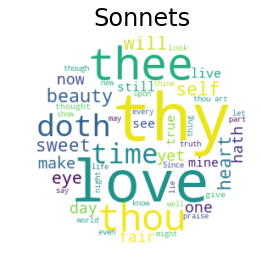

In [23]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Sonnets')

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

In [24]:
obs, obs_map = parse_observations(text)

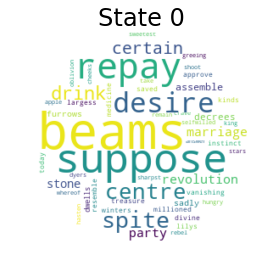

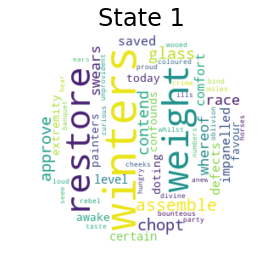

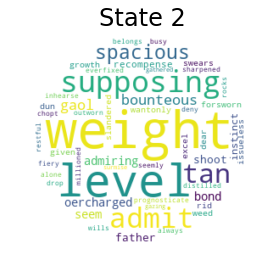

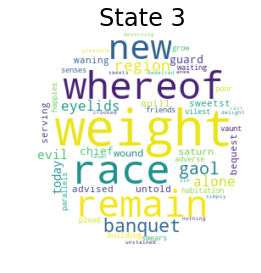

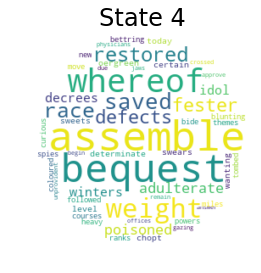

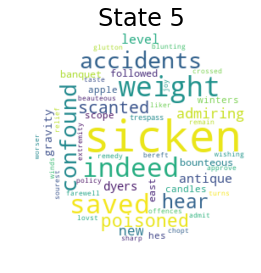

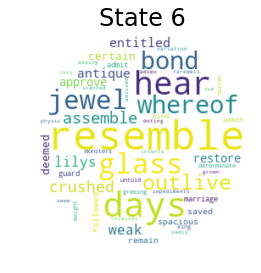

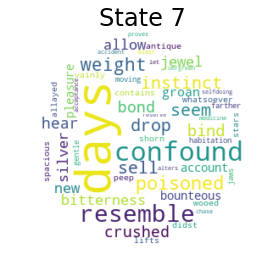

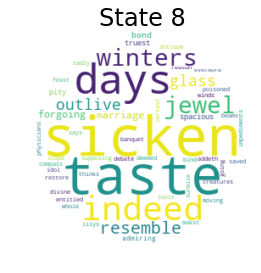

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [37]:
wordclouds = states_to_wordclouds(model, obs_map)